In [218]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

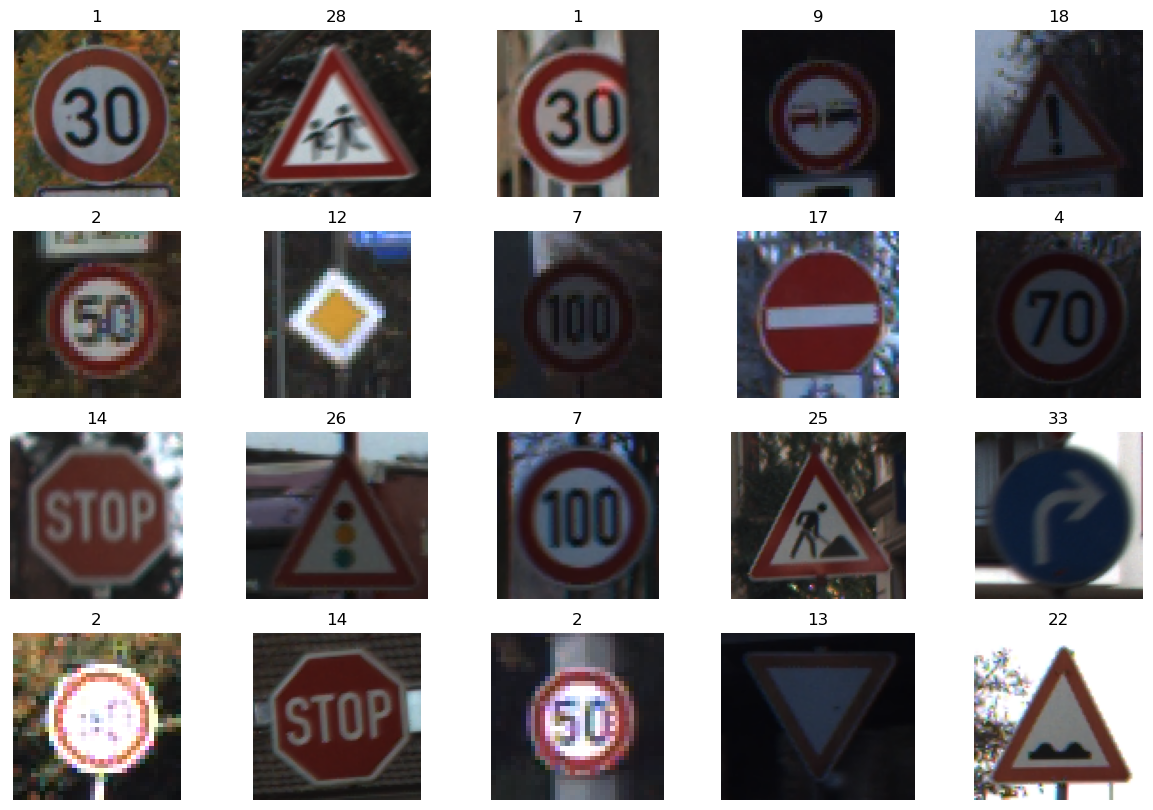

In [221]:
# Load the training labels
root = 'C:/r_d/archive' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(20):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(4,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId']), plt.axis(False)

In [222]:
# Extract class identifiers
# Hint: Check the csv 
import csv

with open('C:/r_d/archive/Train.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    ids = []
    for i,row in enumerate(reader):
        if i == 0:
            continue  # skip the first index, it gives 'ClassId'
        ids.append(row[6])
ids = sorted(ids, key=int)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

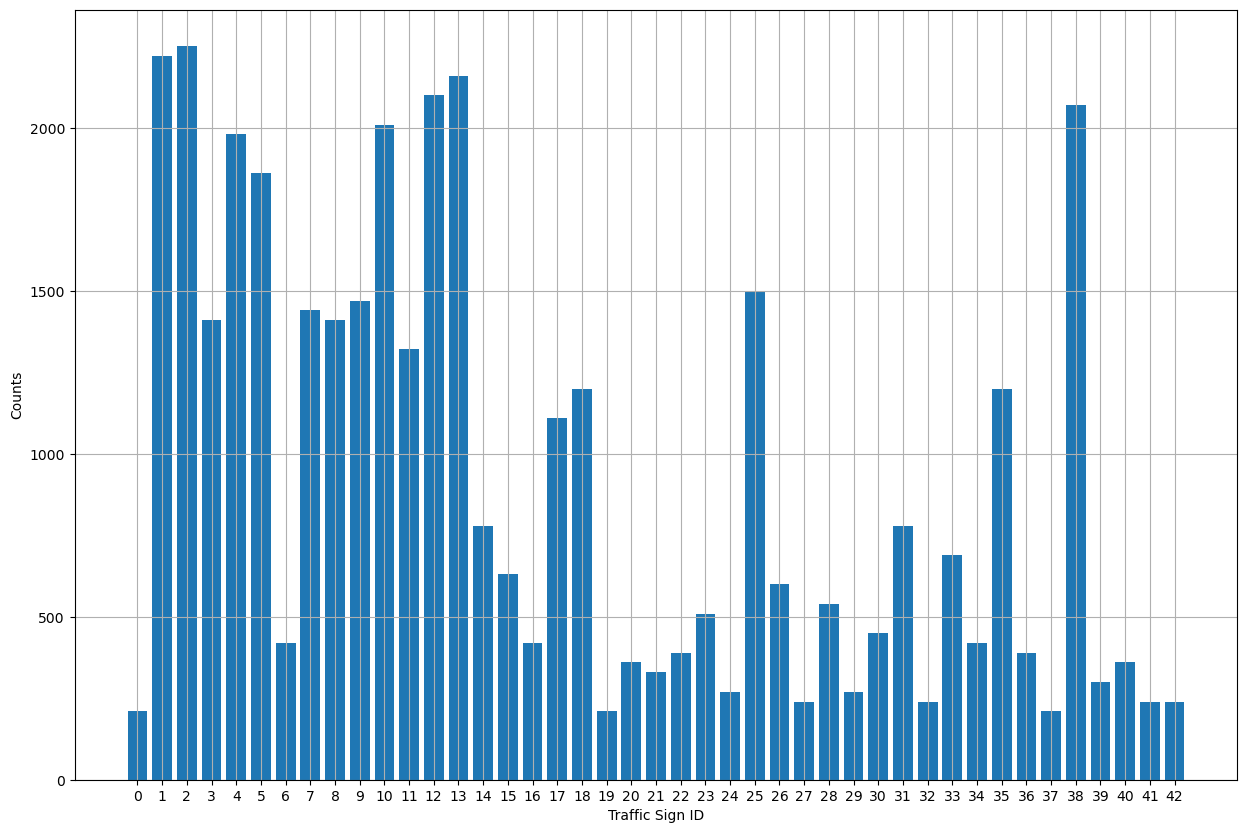

In [223]:
from collections import Counter
hist = Counter(ids)

plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

In [224]:
# Questions
# 1) No.
# let's calculate the standard deviation
import statistics
std = statistics.pstdev(hist.values())
print(std)
# It is 687.7 which is big, in fact, the biggest value is more than 10 times bigger than the smallest one.

687.7177601932607


In [225]:
# 2) I think the threshold for under-represeneted classes is 300, and 1500 for over-represented.
# So, under-represeneted classes are : 0, 19, 24, 27, 29, 32, 37, 39, 41, 42.
# And over-represented classes are : 1, 2, 4, 5, 10, 12, 13, 25, 38.

In [226]:
# Optional 1
# Let's calculate the mean resolution for each class
mean_row = np.zeros(43)
mean_col = np.zeros(43)
for i in range(num_samples) :
    img = cv2.imread(os.path.join(root, data.iloc[i]['Path']))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rows, cols = img.shape
    mean_row[data.iloc[i]['ClassId']]+=rows
    mean_col[data.iloc[i]['ClassId']]+=cols
# The number of pictures in each class from the hist.values()
amount=[210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]
for i in range(43) :
    mean_row[i]/=amount[i]
    mean_col[i]/=amount[i]

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Average Row'))

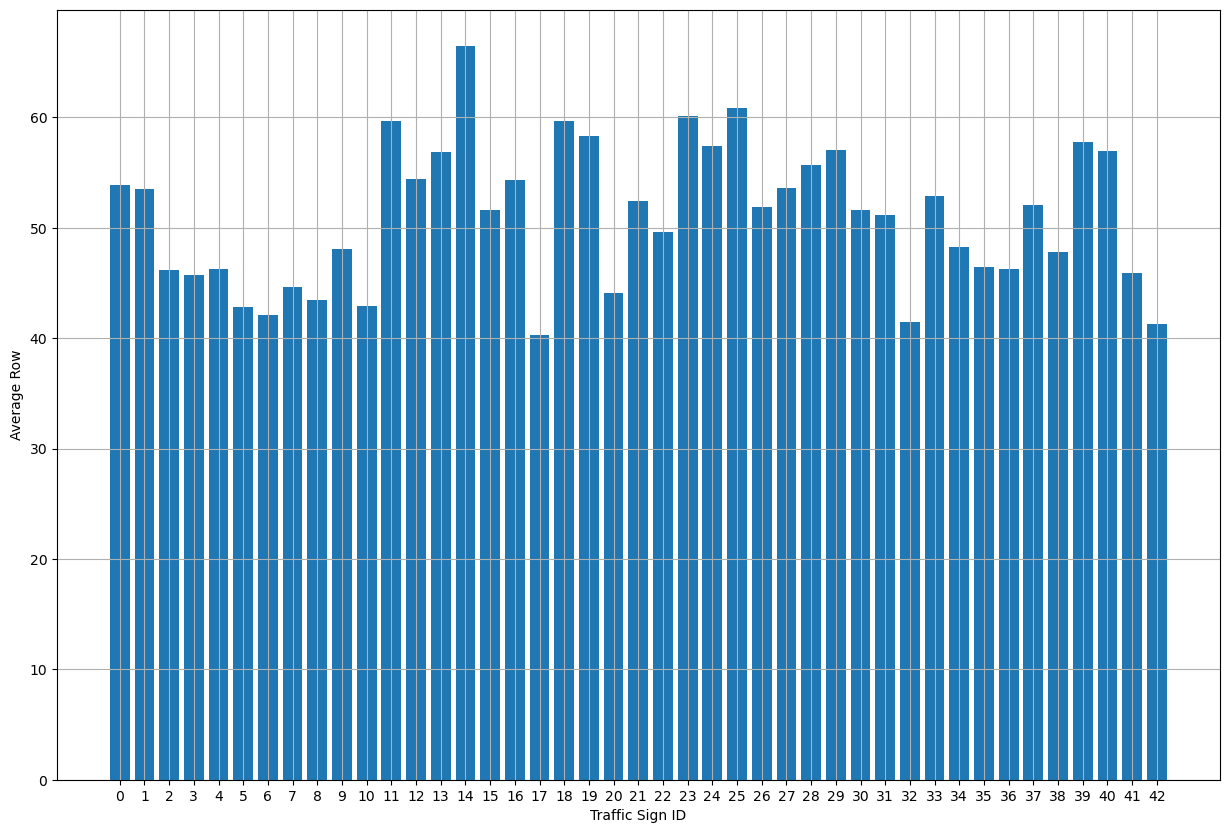

In [227]:
plt.bar(hist.keys(), mean_row), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Average Row')

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Average Col'))

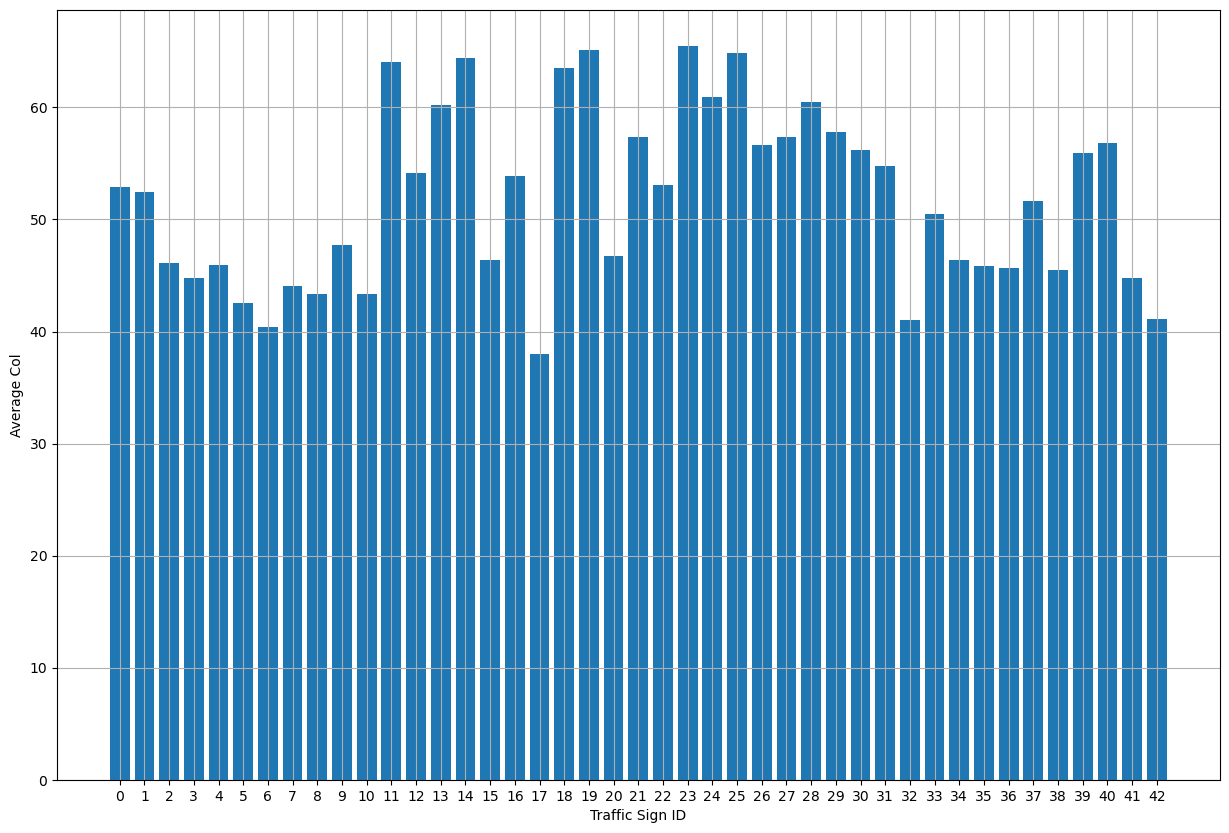

In [228]:
plt.bar(hist.keys(), mean_col), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Average Col')

In [229]:
# Let's calculate the standard deviation
stdX = statistics.pstdev(mean_col)
stdY = statistics.pstdev(mean_row)
print(stdX, stdY)
# It is 7.8 and 6.3. I think resolution doesn't change a lot in this dataset

7.826700094189559 6.32223125273719


In [230]:
# Optional 2
# Let's calculate the mean brightness for each class
mean_brightness = np.zeros(43)
for i in range(num_samples) :
    img = cv2.imread(os.path.join(root, data.iloc[i]['Path']))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    mean_brightness[data.iloc[i]['ClassId']]+=np.mean(img)
# Data from the hist.values()
amount=[210, 2220, 2250, 1410, 1980, 1860, 420, 1440, 1410, 1470, 2010, 1320, 2100, 2160, 780, 630, 420, 1110, 1200, 210, 360, 330, 390, 510, 270, 1500, 600, 240, 540, 270, 450, 780, 240, 689, 420, 1200, 390, 210, 2070, 300, 360, 240, 240]
for i in range(43) :
    mean_brightness[i]/=amount[i]

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Average Brightness'))

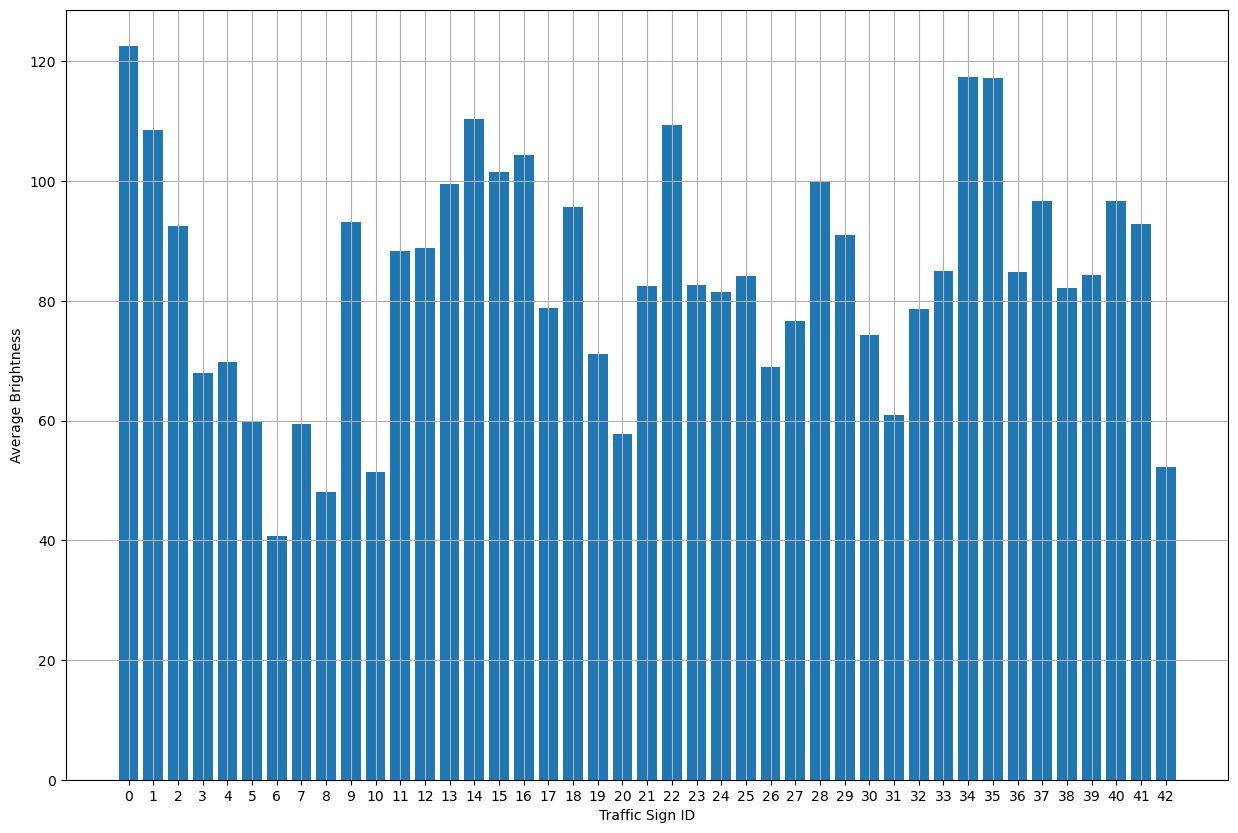

In [232]:
plt.bar(hist.keys(), mean_brightness), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Average Brightness')

In [231]:
# Calculating the standard deviation
std = statistics.pstdev(mean_brightness)
print(std)
# It is 19.5 which means that brightness is not stable in this dataset

19.50563236135063
